In [1]:
import numpy as np 
import pandas as pd 


df = pd.read_csv("D:/Data Science/internship/Feyyen labs/mcdonalds.csv")

In [3]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Sample Data
data = {
    'yummy': ['No', 'Yes', 'No', 'Yes', 'No'],
    'convenient': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes'],
    'spicy': ['No', 'No', 'Yes', 'No', 'No'],
    'fattening': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes'],
    'greasy': ['No', 'Yes', 'Yes', 'Yes', 'Yes'],
    'fast': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes'],
    'cheap': ['Yes', 'Yes', 'No', 'Yes', 'Yes'],
    'tasty': ['No', 'Yes', 'Yes', 'Yes', 'No'],
    'expensive': ['Yes', 'Yes', 'Yes', 'No', 'No'],
    'healthy': ['No', 'No', 'Yes', 'No', 'Yes'],
    'disgusting': ['No', 'No', 'No', 'Yes', 'No'],
    'Like': ['-3', '+2', '+1', '+4', '+2'],
    'Age': [61, 51, 62, 69, 49],
    'VisitFrequency': ['Every three months', 'Every three months', 'Every three months', 'Once a week', 'Once a month'],
    'Gender': ['Female', 'Female', 'Female', 'Female', 'Male']
}

df = pd.DataFrame(data)

# Convert categorical variables to numerical values
categorical_features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'VisitFrequency', 'Gender']
numerical_features = ['Like', 'Age']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X = preprocessor.fit_transform(df)


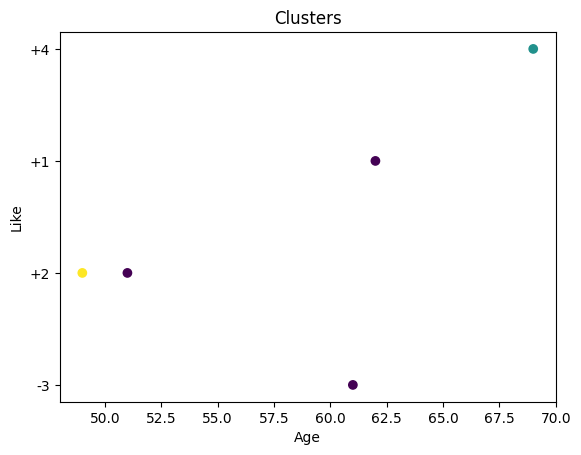

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X)

# Adding cluster labels to the original dataframe
df['Cluster'] = clusters

# Visualize clusters (optional)
plt.scatter(df['Age'], df['Like'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Like')
plt.title('Clusters')
plt.show()


In [6]:
# Analyze each segment
for cluster in df['Cluster'].unique():
    print(f"\nCluster {cluster}:")
    print(df[df['Cluster'] == cluster].describe(include='all'))



Cluster 0:
       yummy convenient spicy fattening greasy fast cheap tasty expensive  \
count      3          3     3         3      3    3     3     3         3   
unique     2          1     2         1      2    1     2     2         1   
top       No        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
freq       2          3     2         3      2    3     2     2         3   
mean     NaN        NaN   NaN       NaN    NaN  NaN   NaN   NaN       NaN   
std      NaN        NaN   NaN       NaN    NaN  NaN   NaN   NaN       NaN   
min      NaN        NaN   NaN       NaN    NaN  NaN   NaN   NaN       NaN   
25%      NaN        NaN   NaN       NaN    NaN  NaN   NaN   NaN       NaN   
50%      NaN        NaN   NaN       NaN    NaN  NaN   NaN   NaN       NaN   
75%      NaN        NaN   NaN       NaN    NaN  NaN   NaN   NaN       NaN   
max      NaN        NaN   NaN       NaN    NaN  NaN   NaN   NaN       NaN   

       healthy disgusting Like        Age      VisitFrequency  

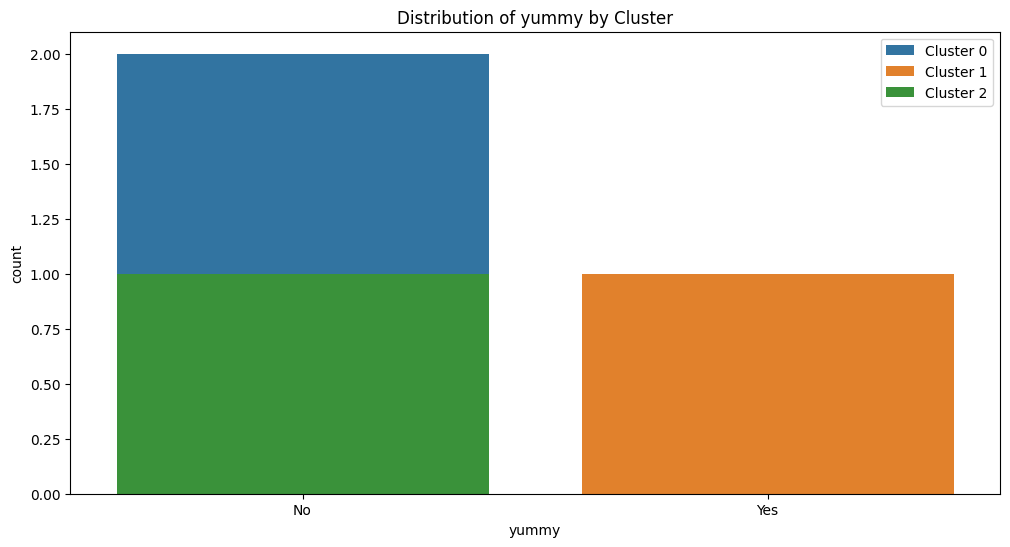

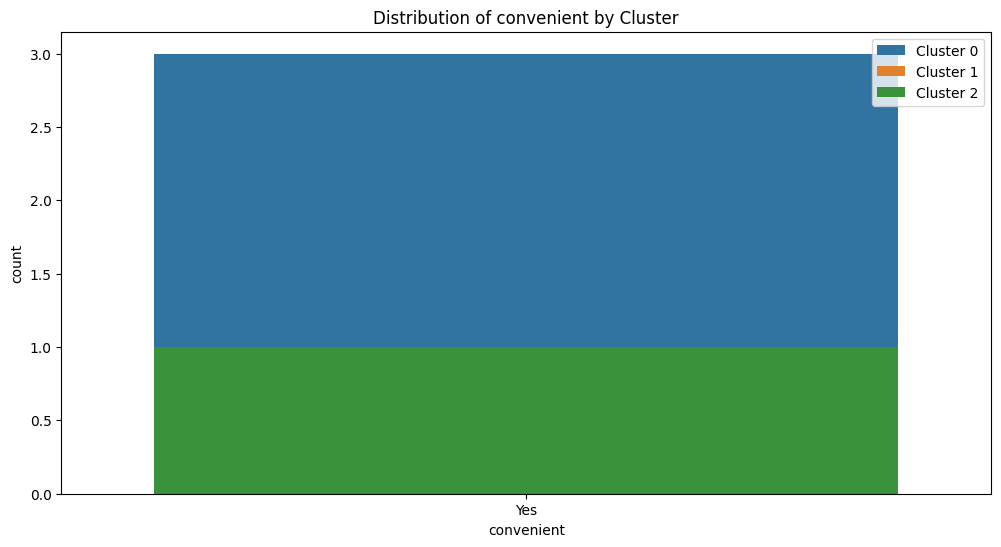

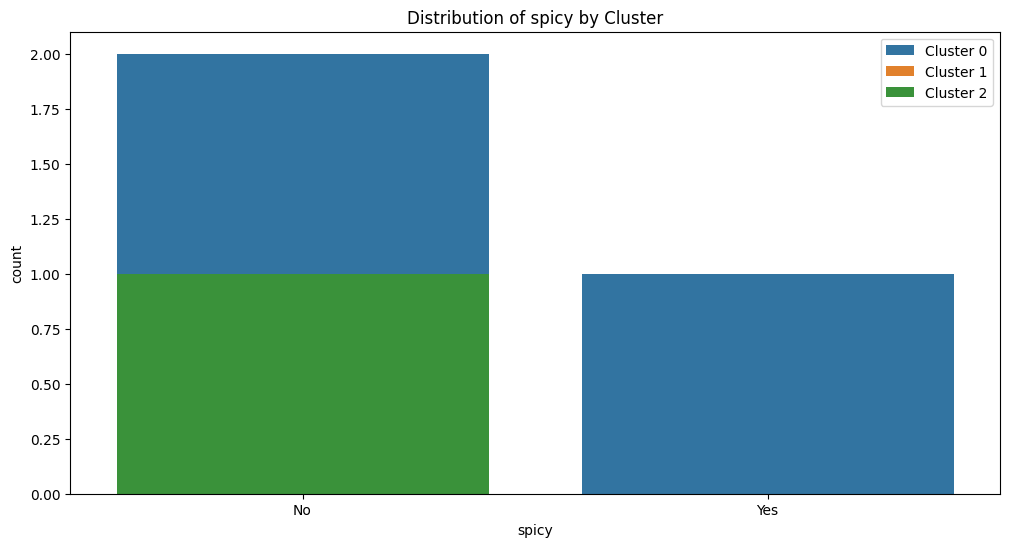

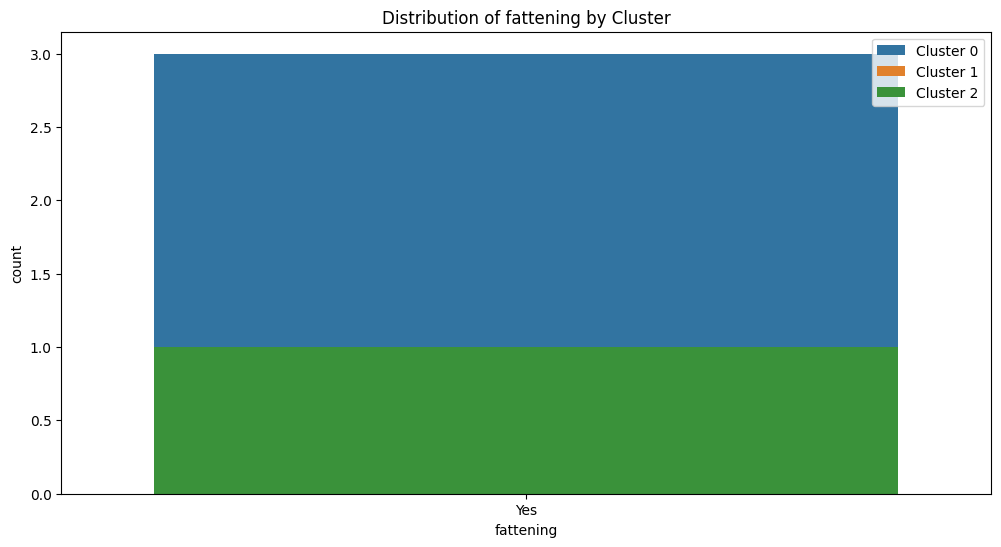

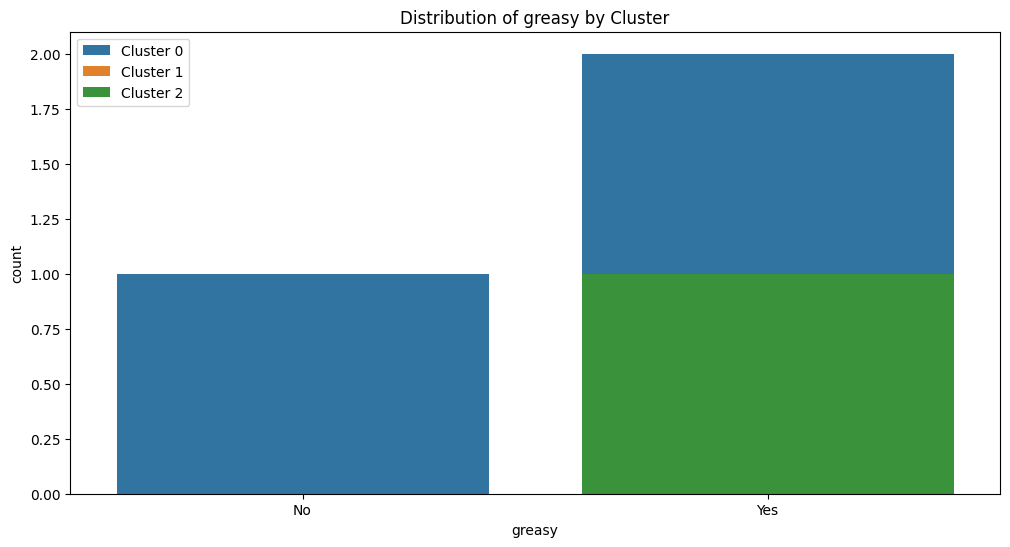

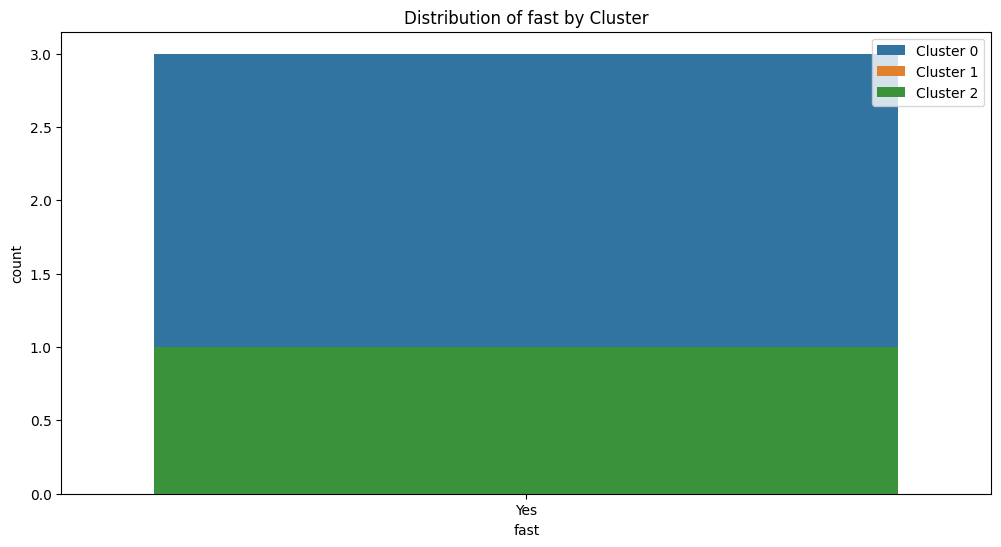

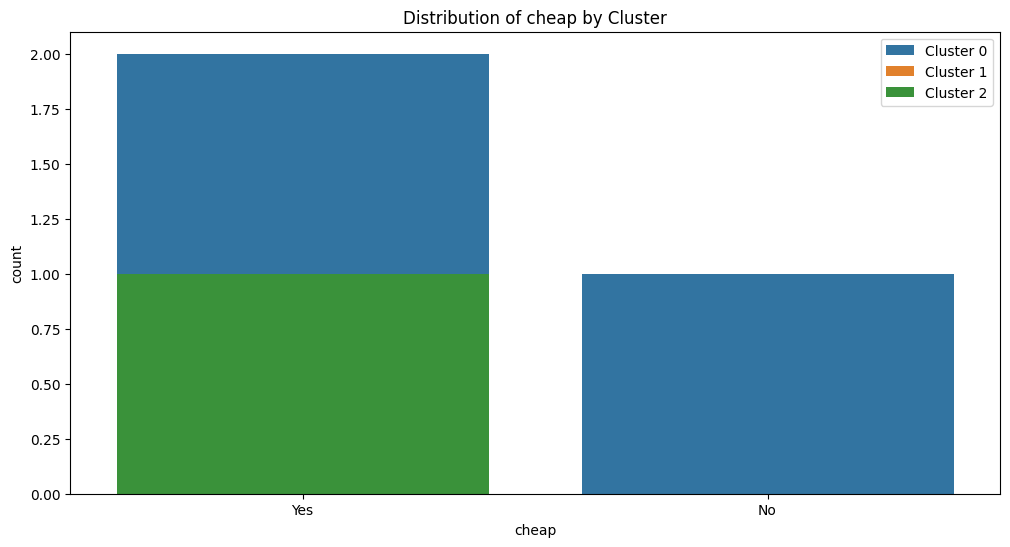

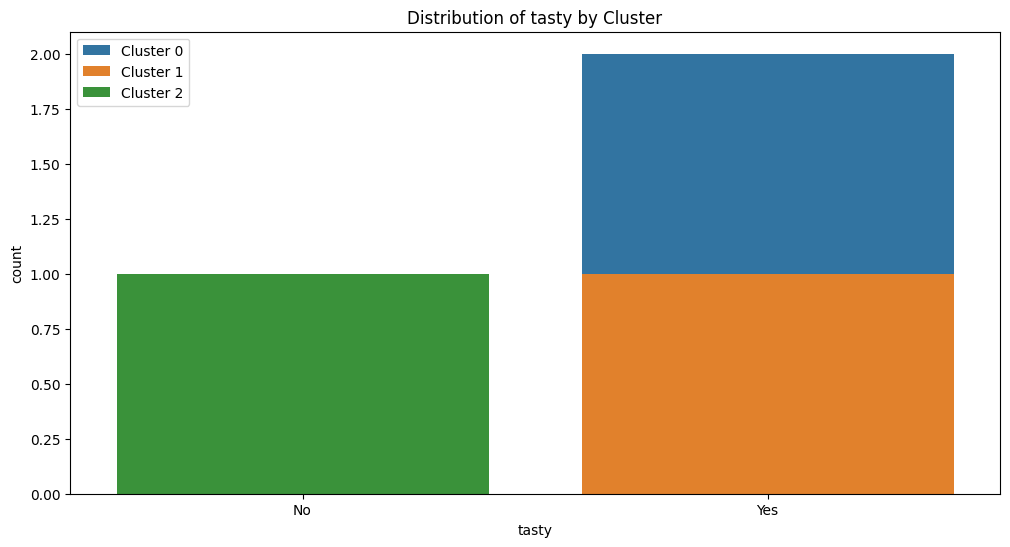

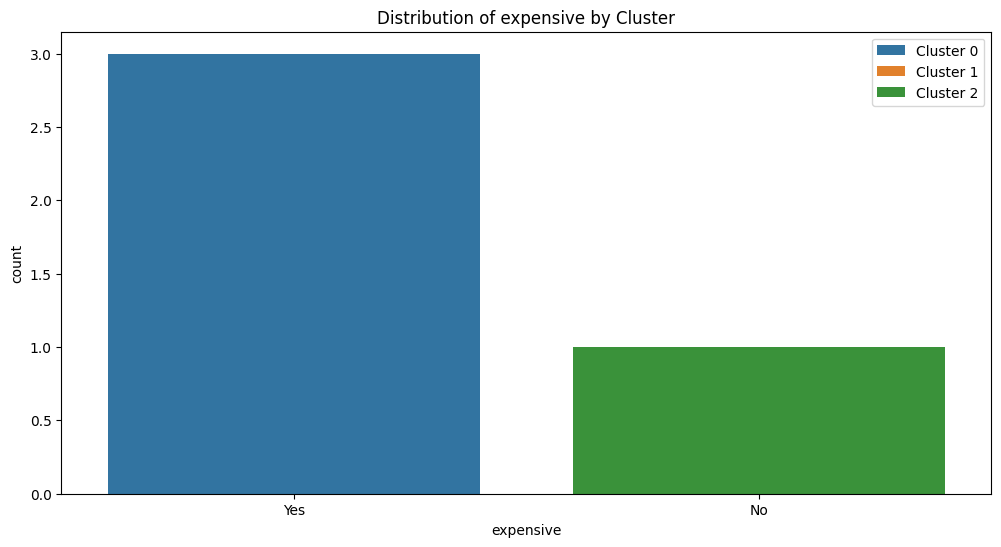

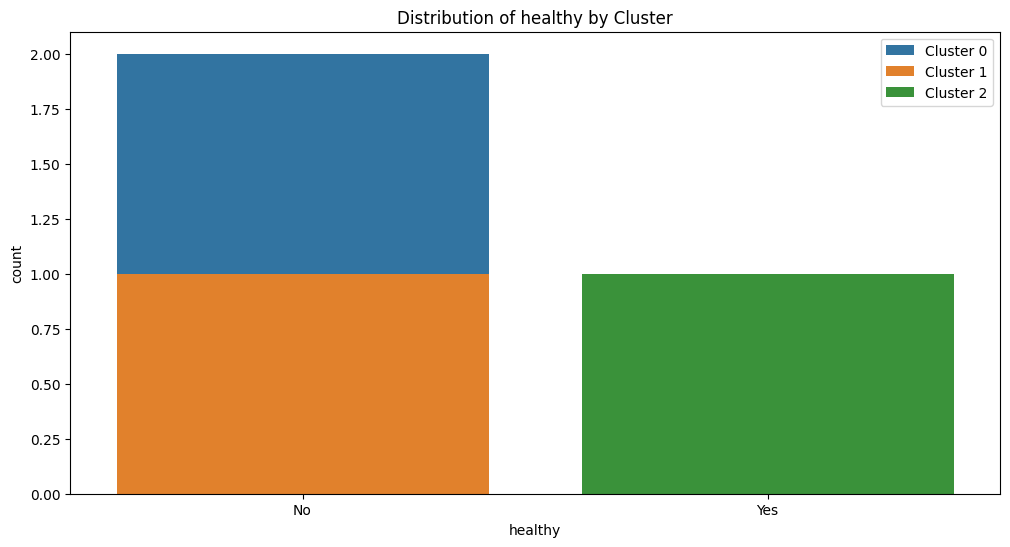

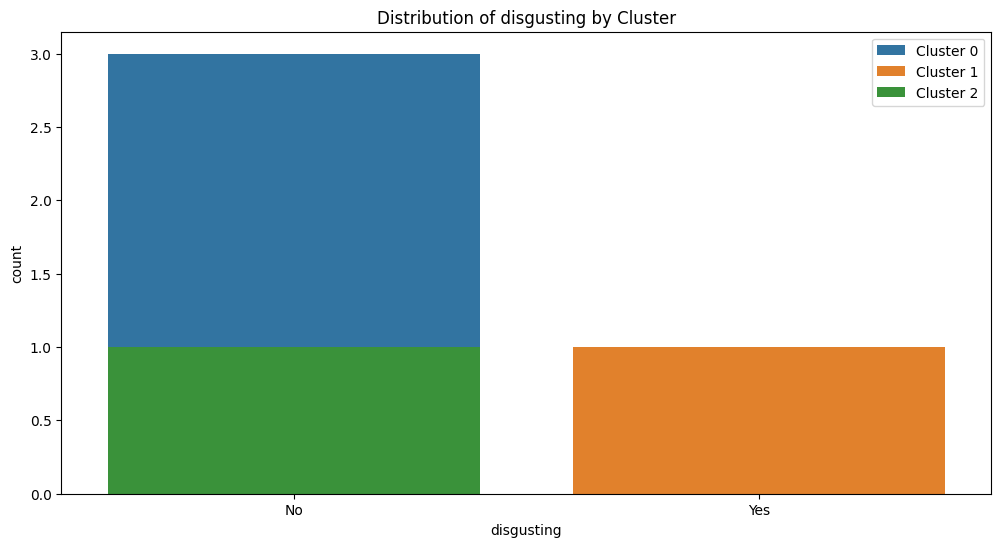

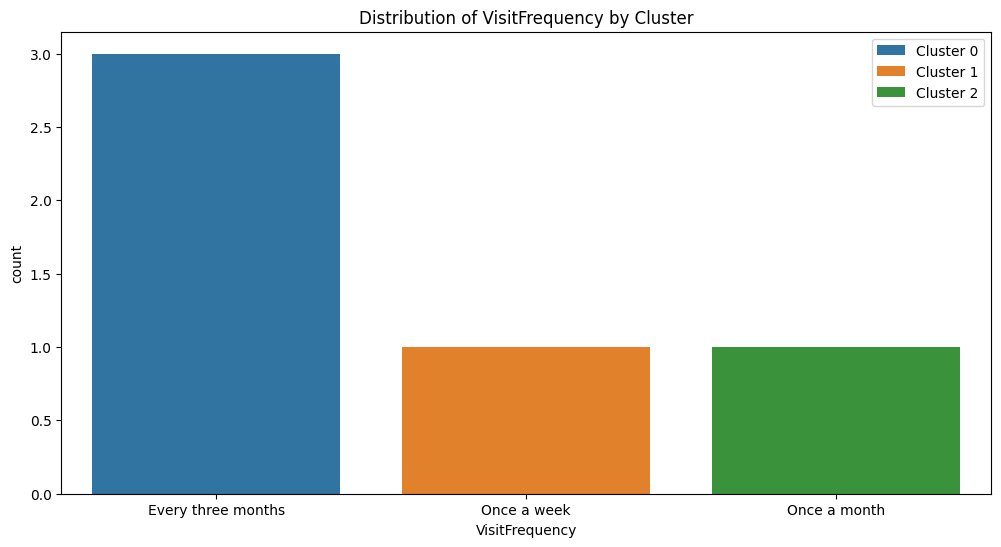

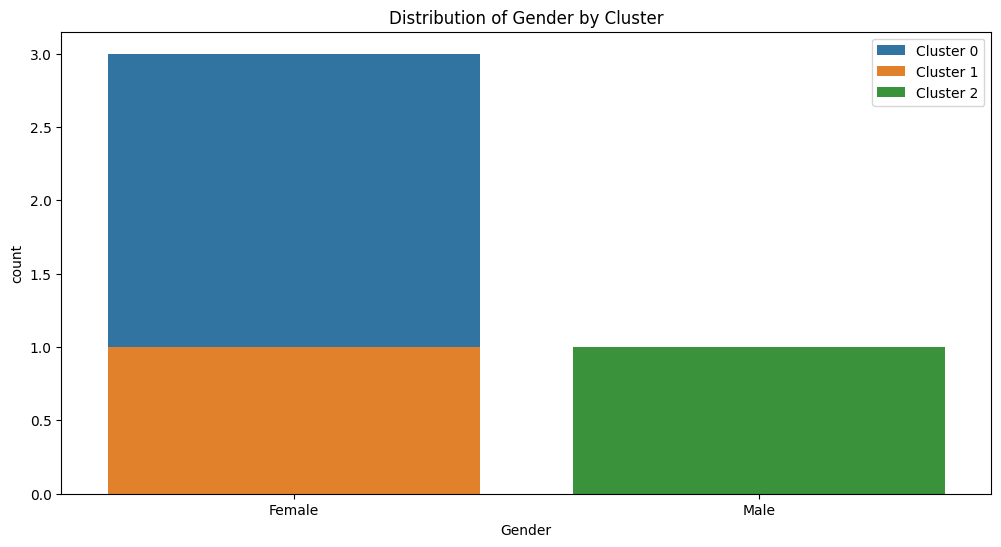

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with cluster labels
def plot_categorical_distribution(df, cat_columns):
    cluster_labels = df['Cluster'].unique()
    
    for col in cat_columns:
        plt.figure(figsize=(12, 6))
        for cluster in cluster_labels:
            subset = df[df['Cluster'] == cluster]
            sns.countplot(x=col, data=subset, label=f'Cluster {cluster}')
        plt.title(f'Distribution of {col} by Cluster')
        plt.legend()
        plt.show()

cat_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'VisitFrequency', 'Gender']
plot_categorical_distribution(df, cat_columns)


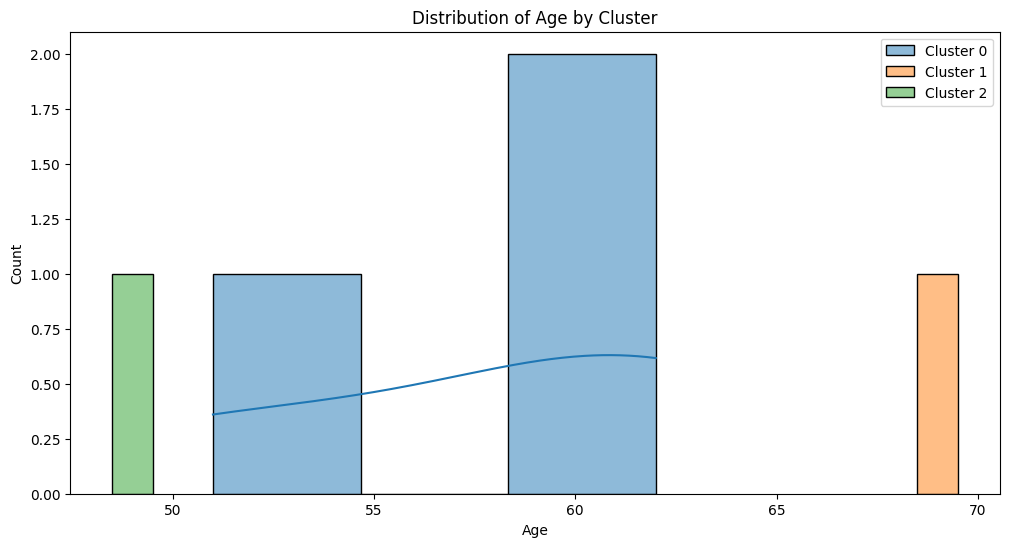

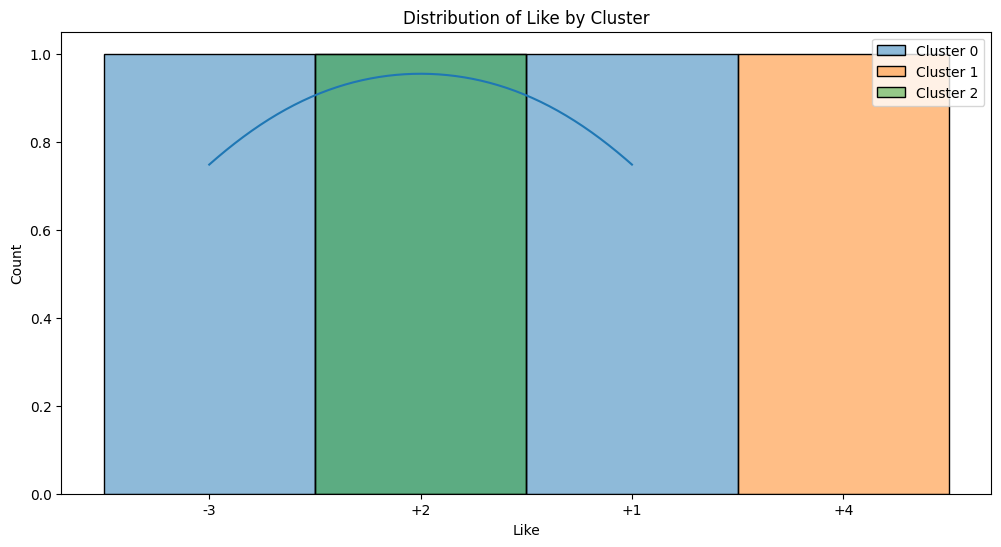

In [8]:
def plot_numerical_distribution(df, num_columns):
    cluster_labels = df['Cluster'].unique()
    
    for col in num_columns:
        plt.figure(figsize=(12, 6))
        for cluster in cluster_labels:
            subset = df[df['Cluster'] == cluster]
            sns.histplot(subset[col], kde=True, label=f'Cluster {cluster}')
        plt.title(f'Distribution of {col} by Cluster')
        plt.legend()
        plt.show()

num_columns = ['Age', 'Like']
plot_numerical_distribution(df, num_columns)


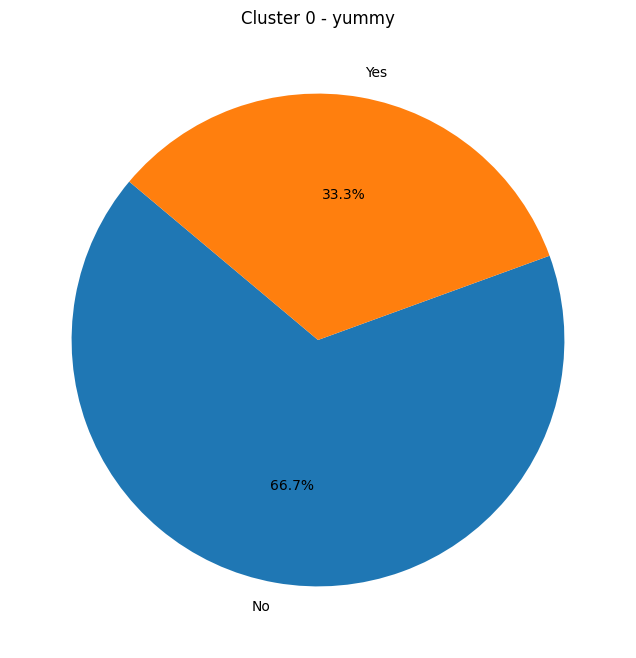

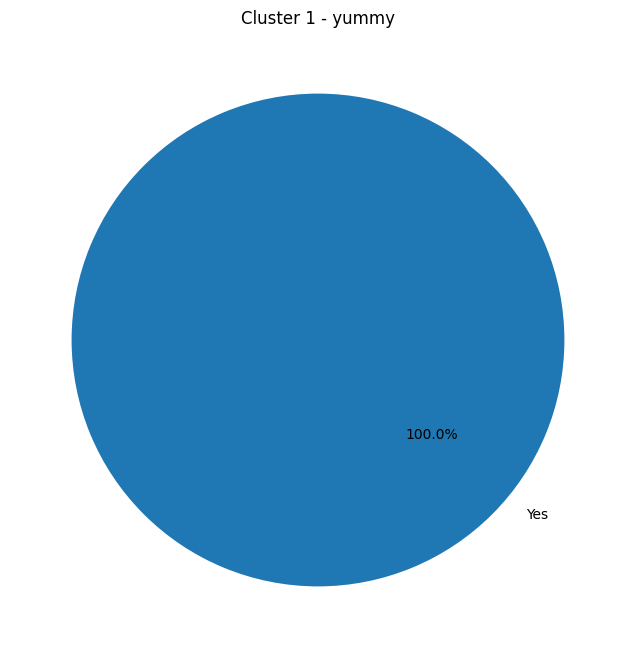

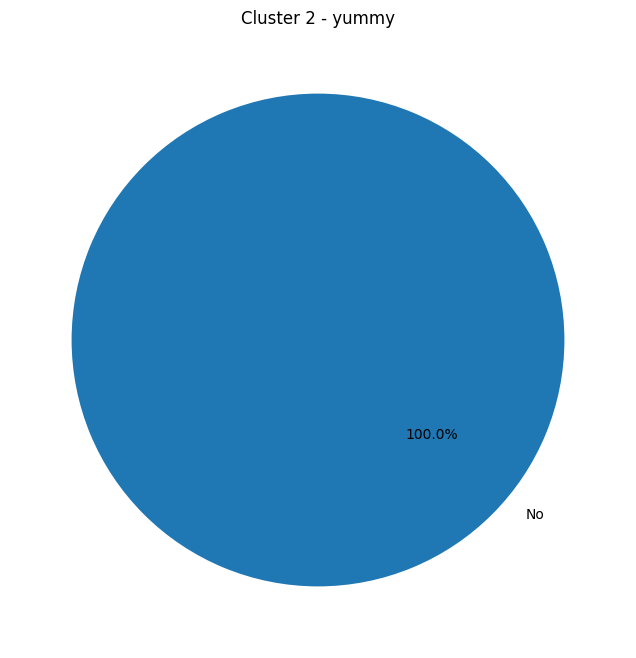

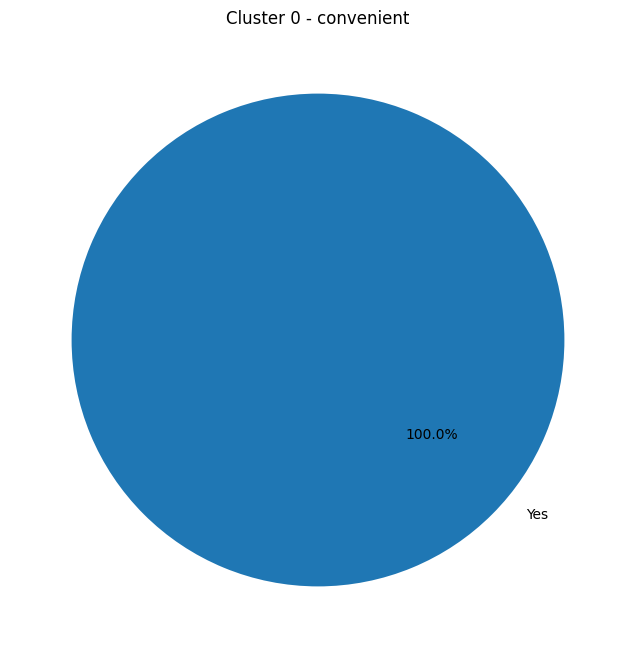

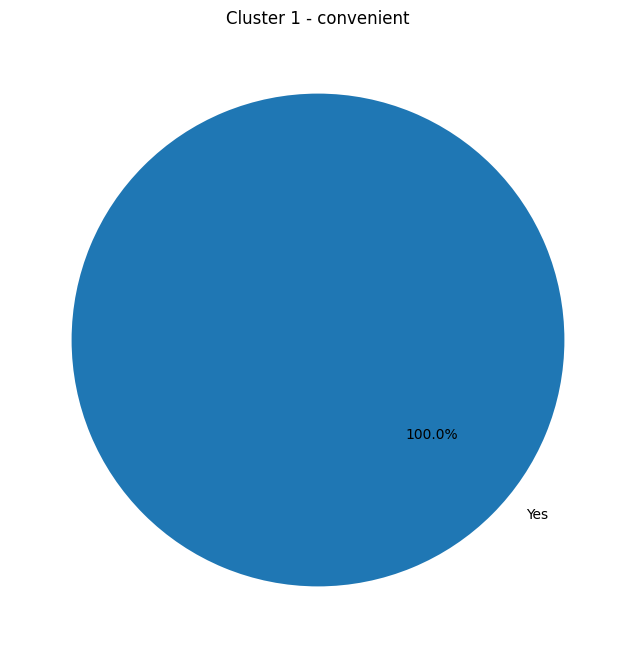

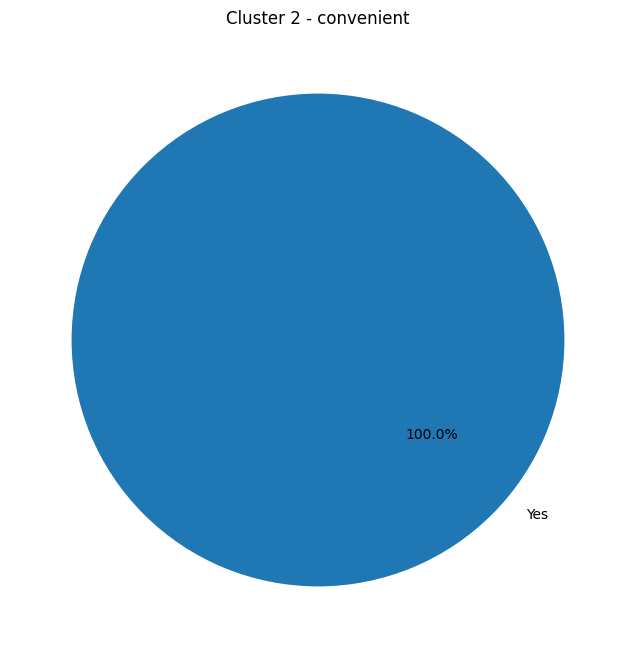

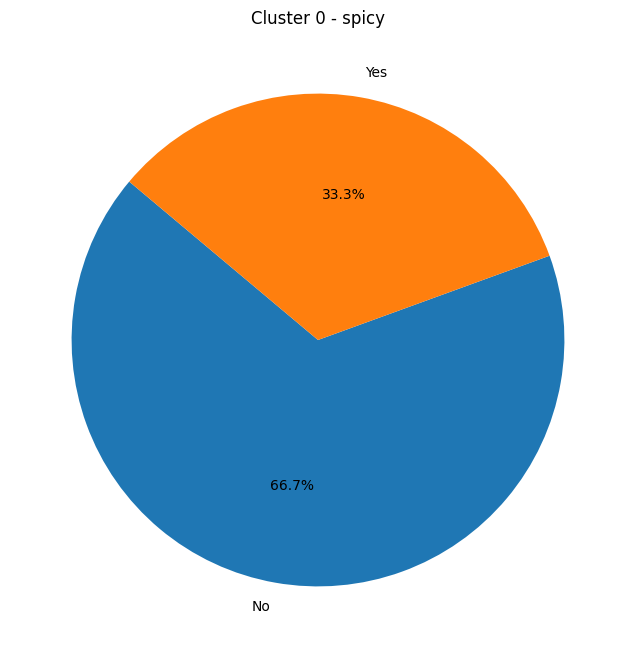

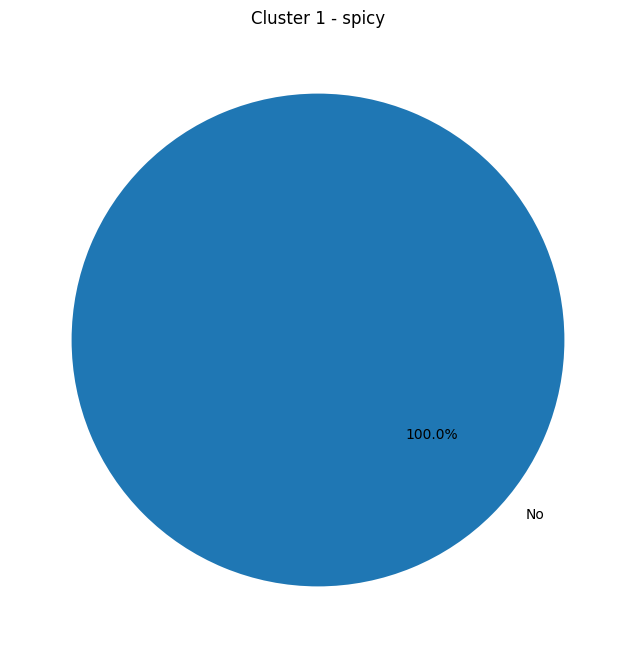

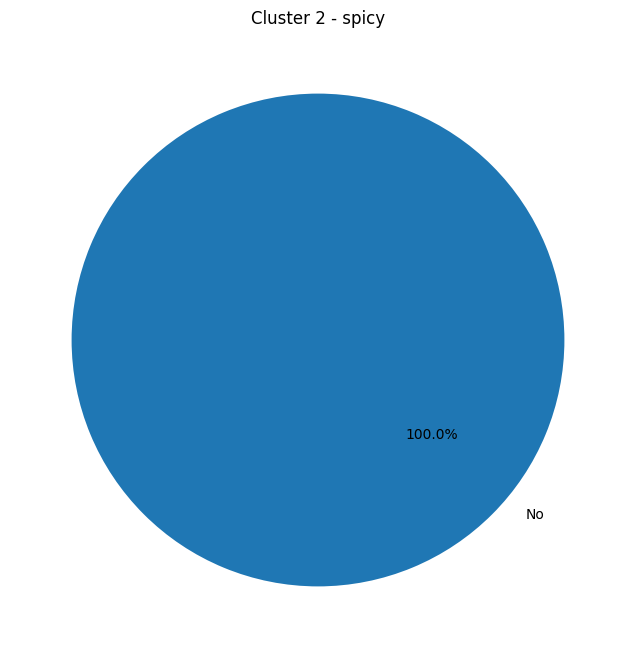

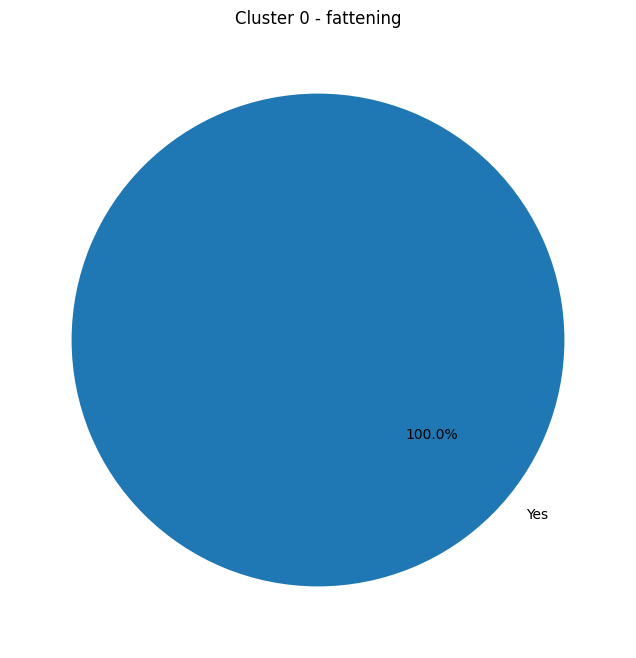

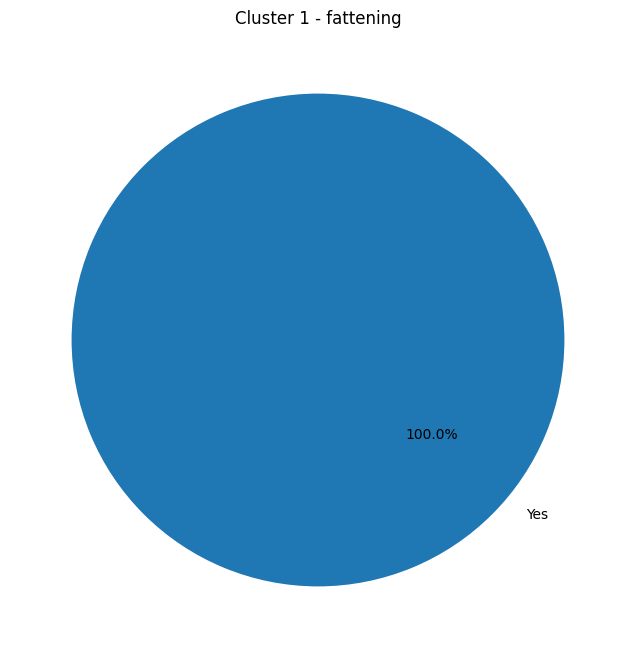

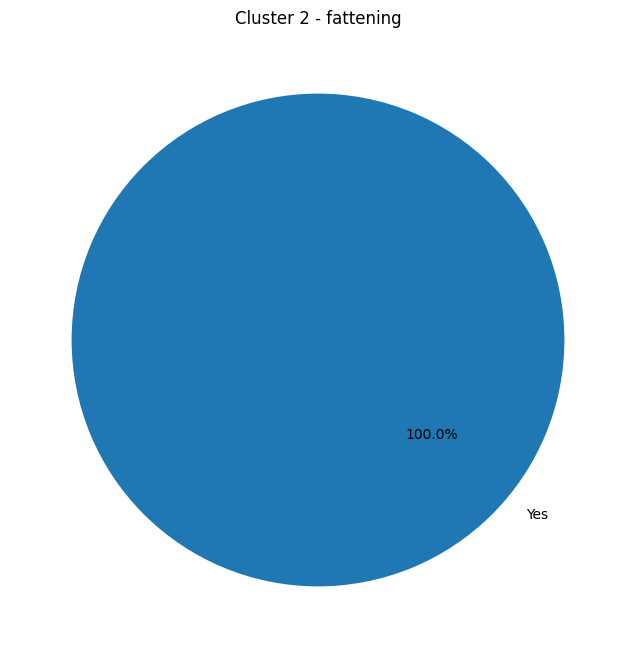

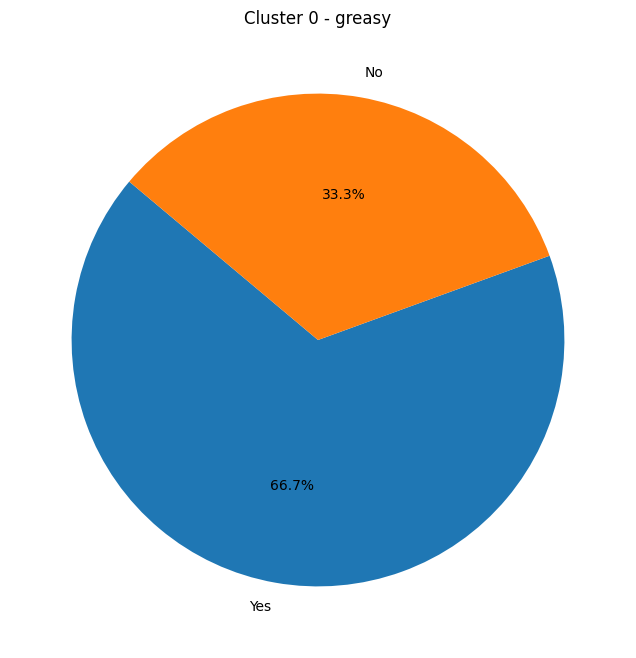

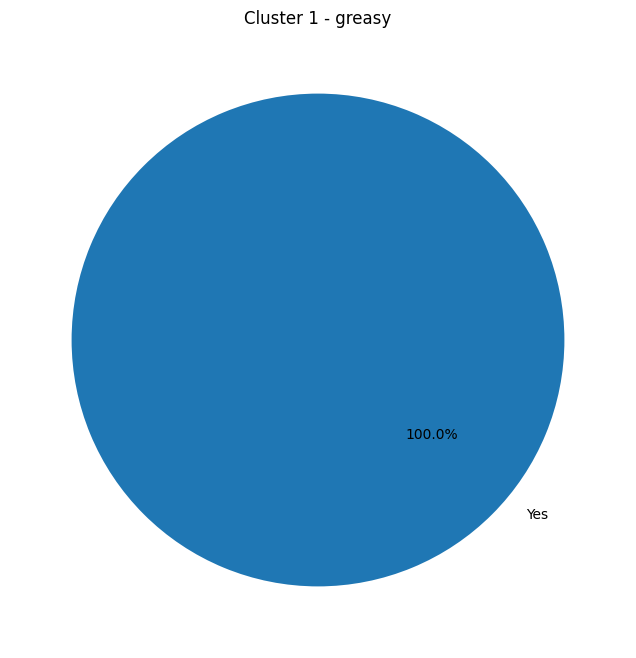

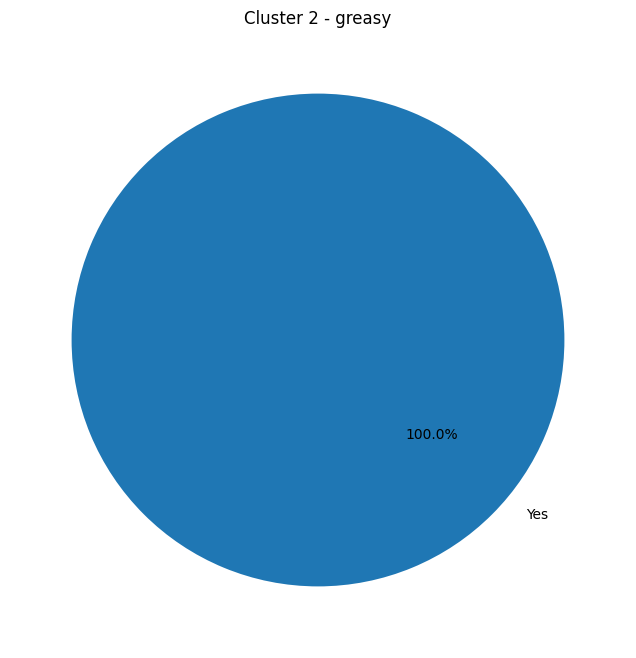

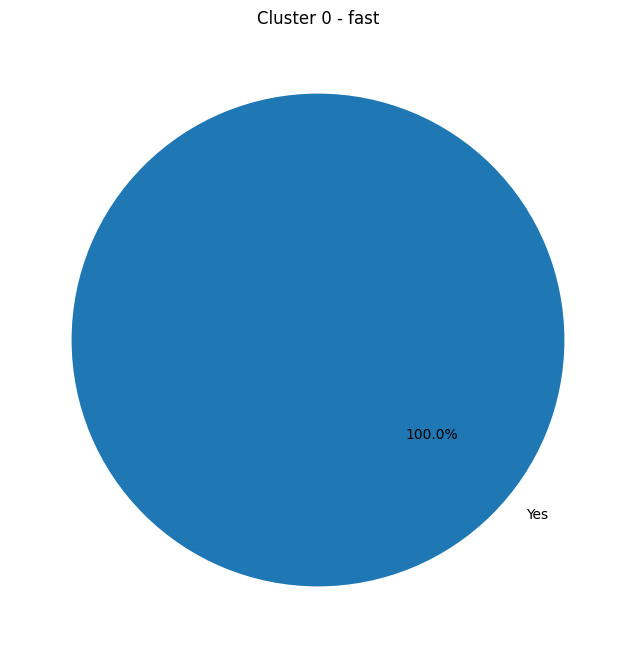

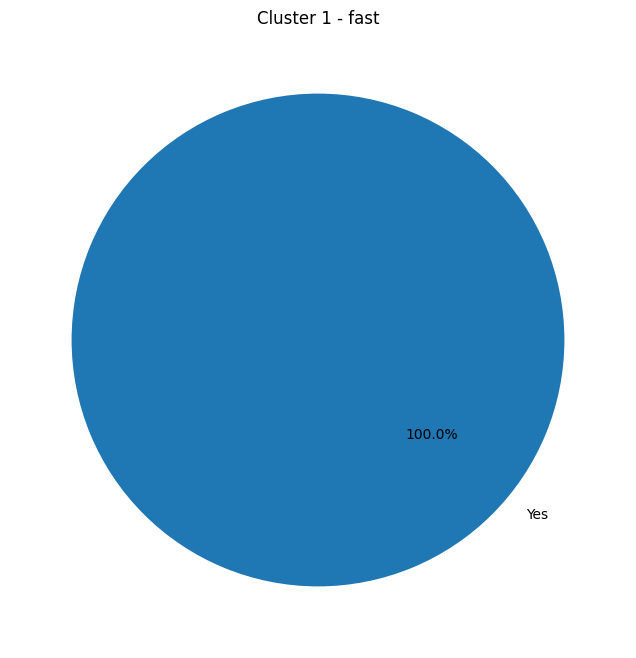

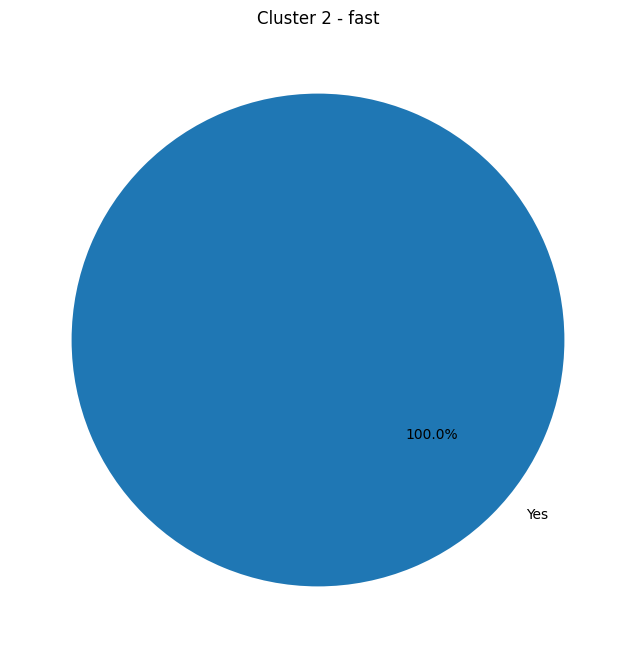

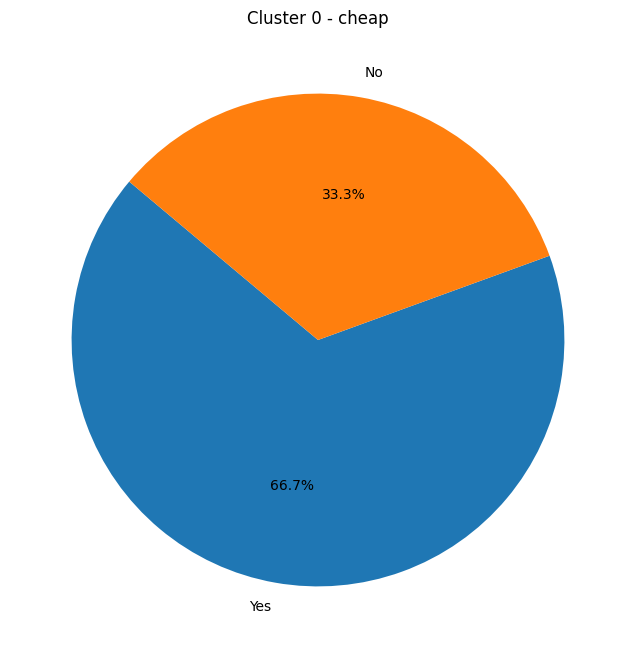

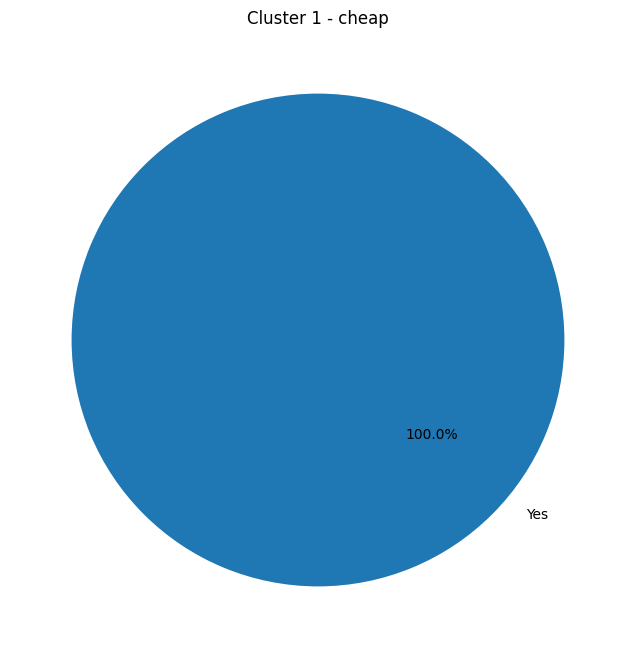

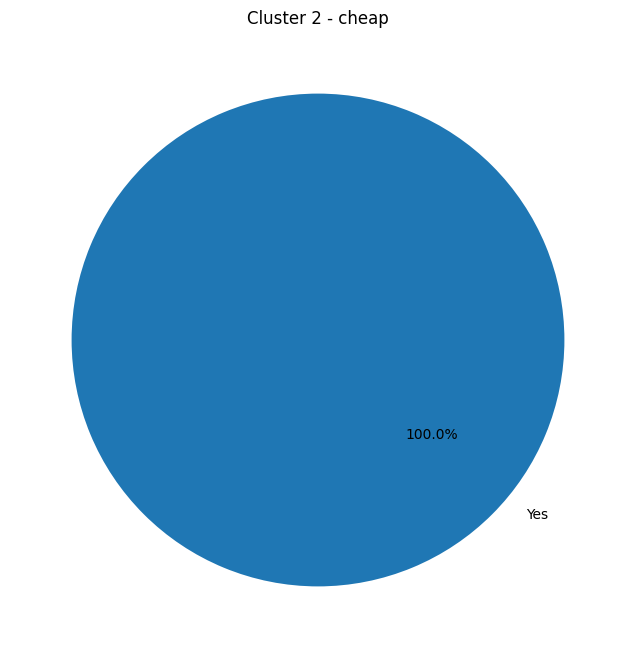

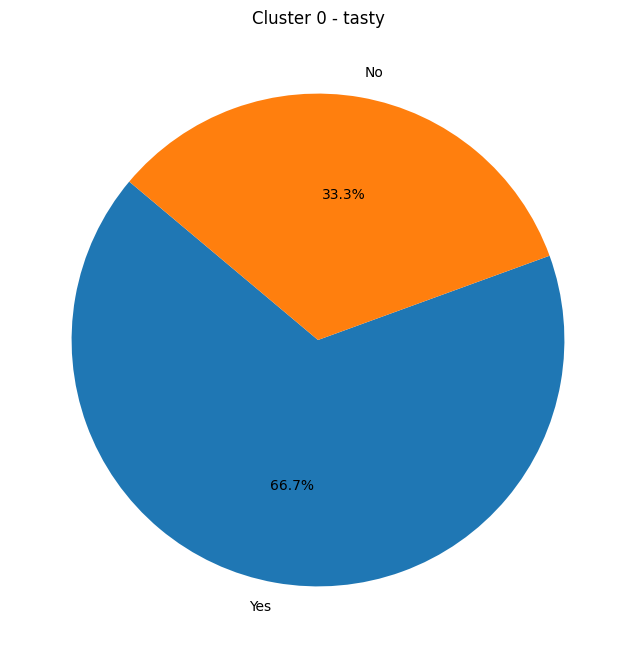

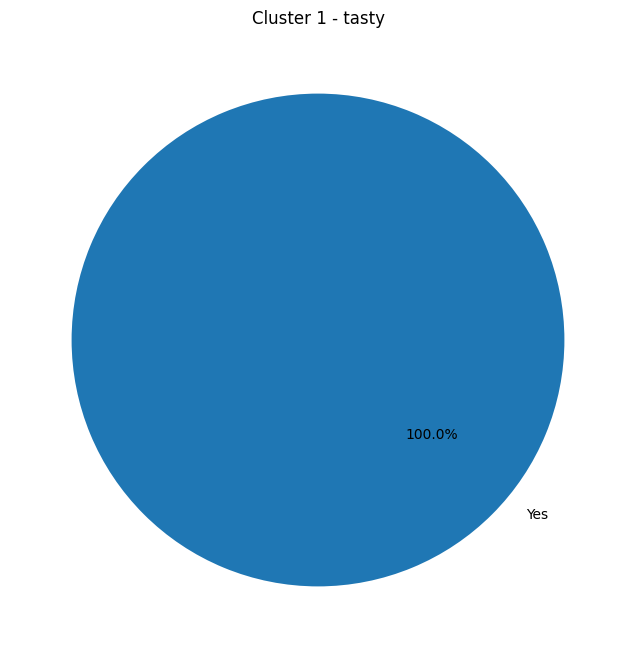

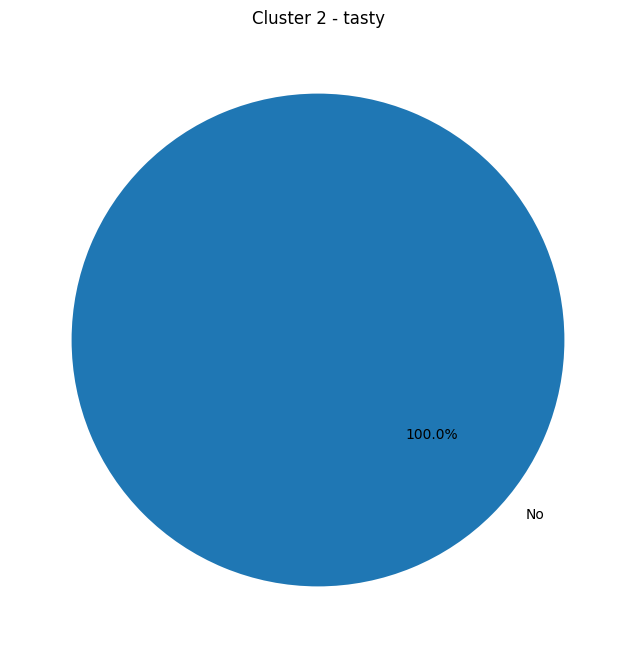

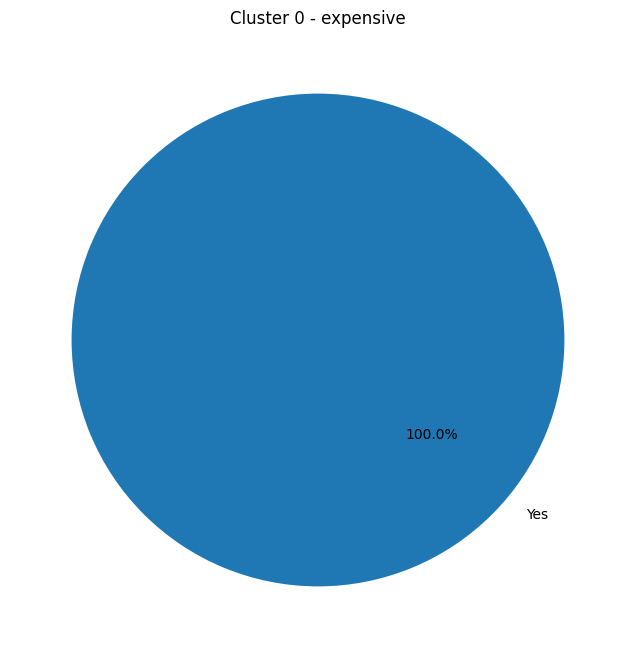

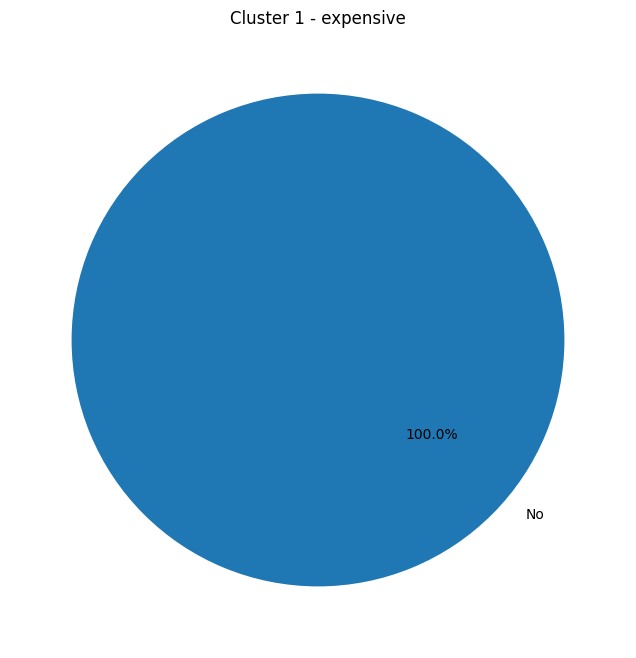

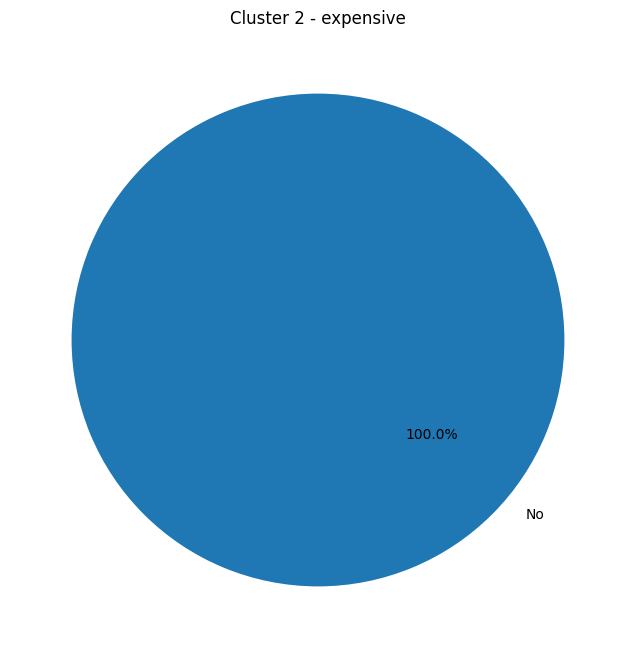

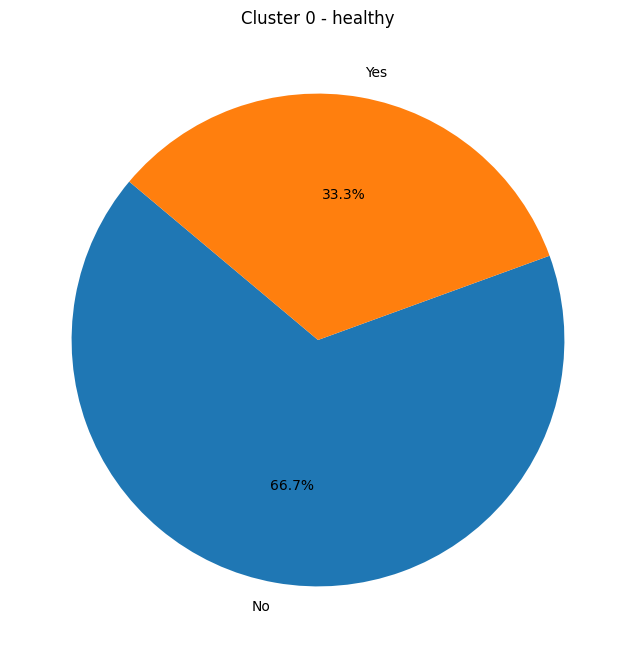

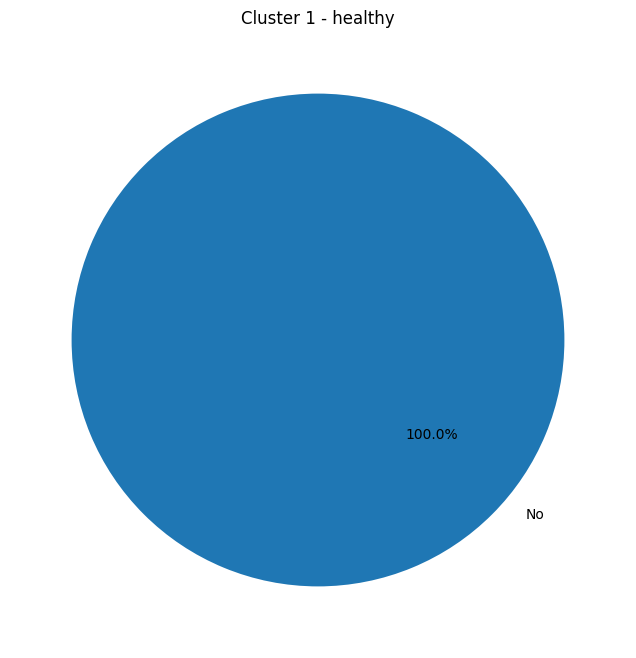

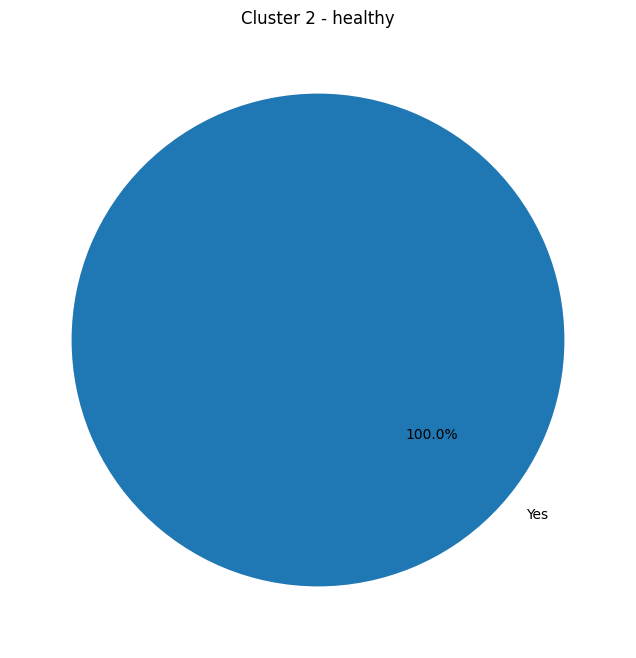

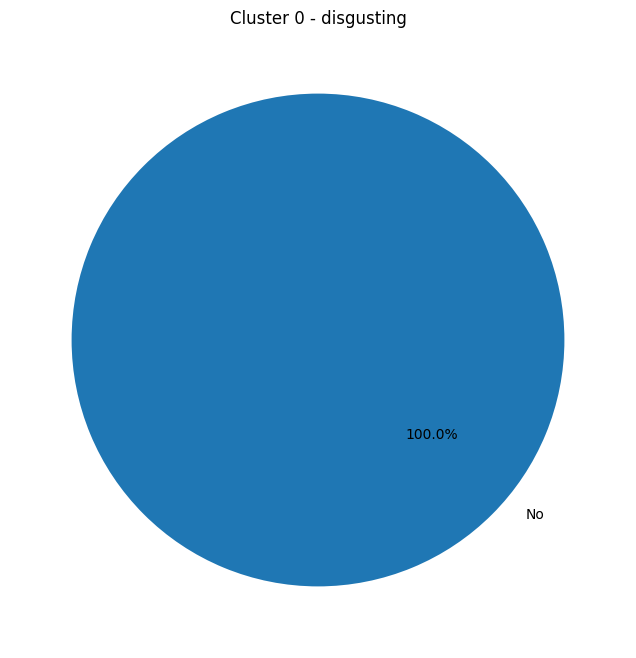

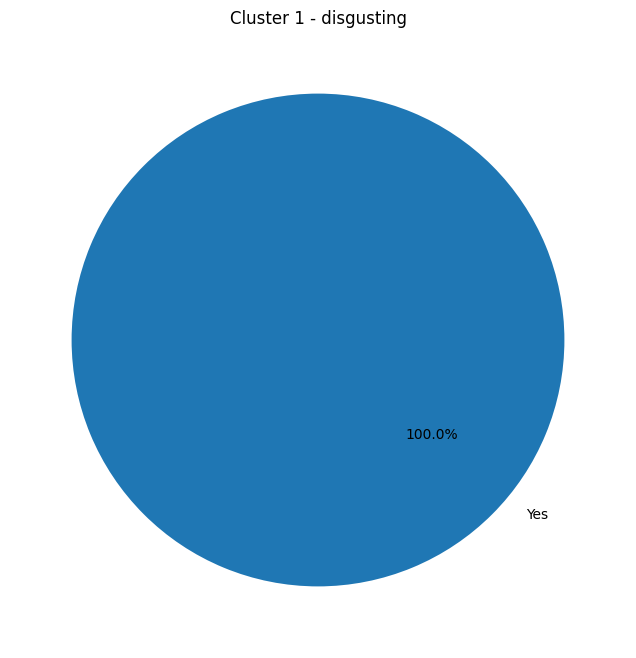

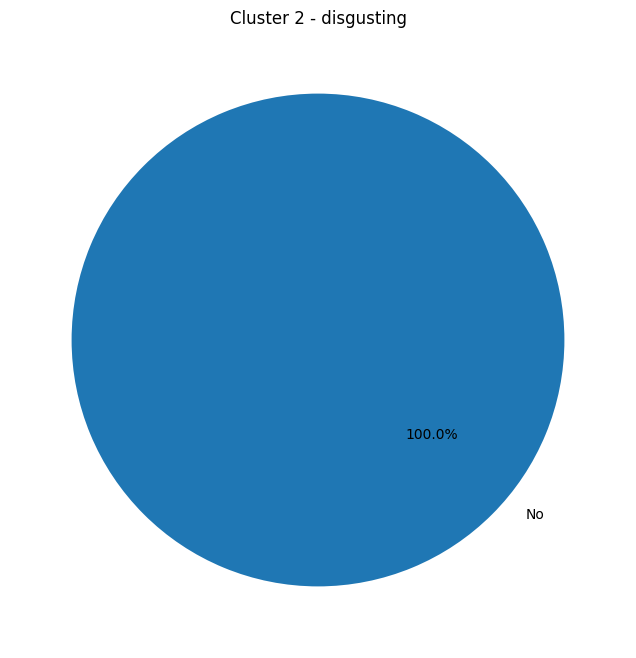

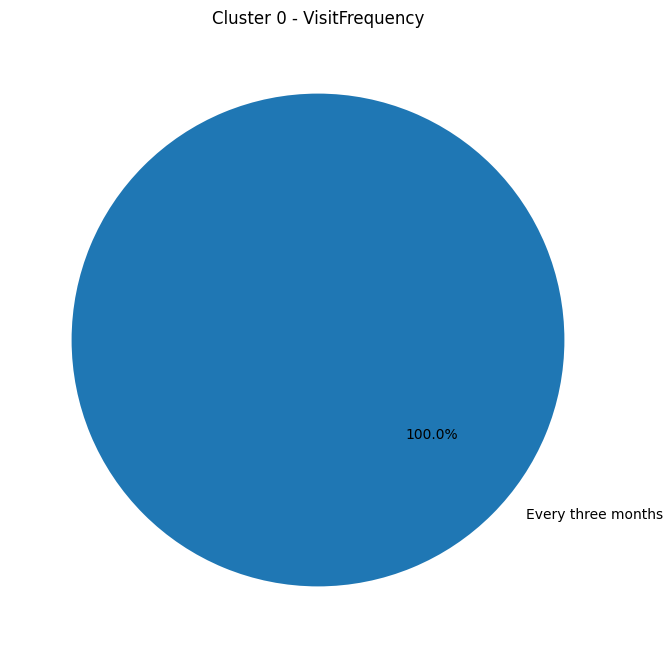

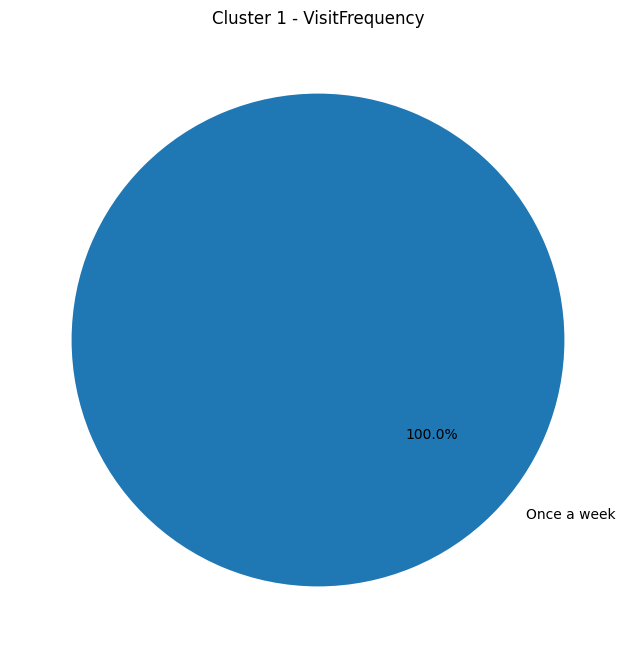

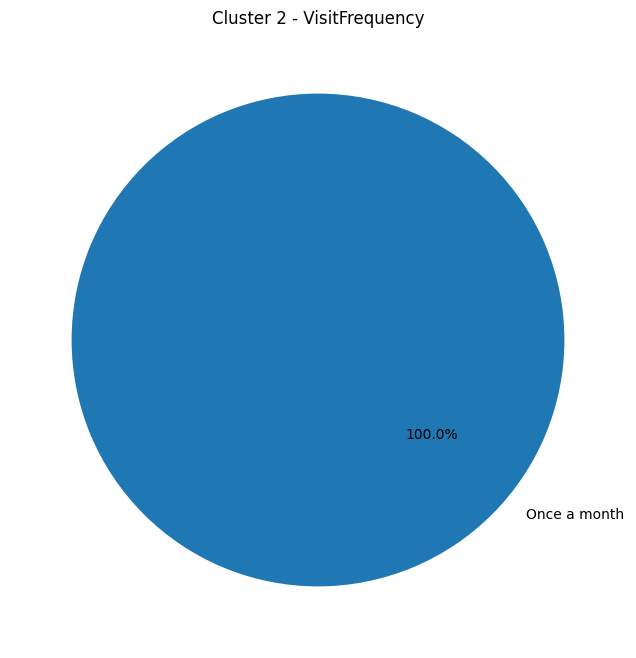

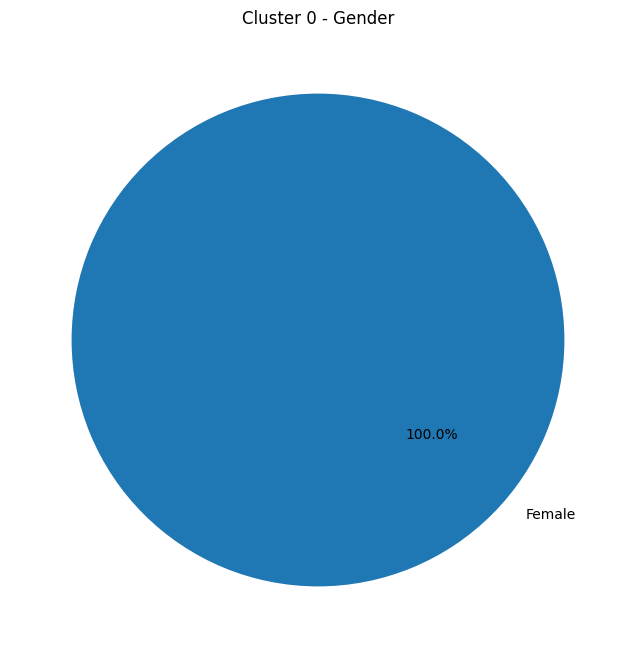

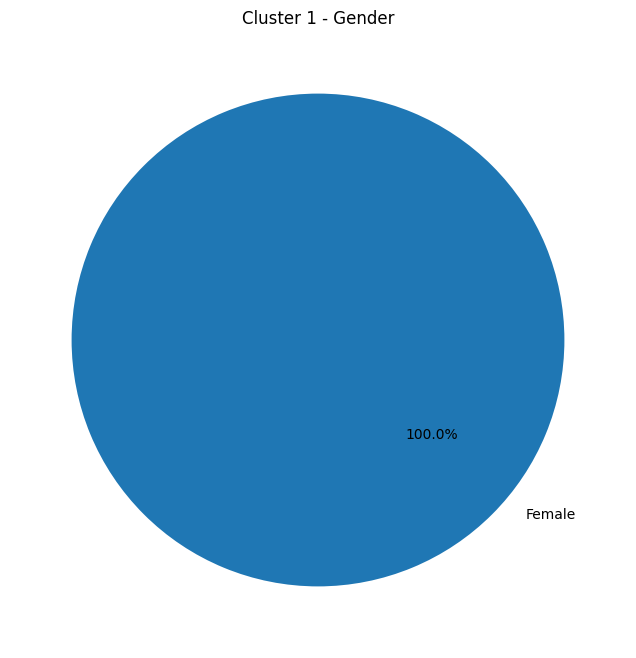

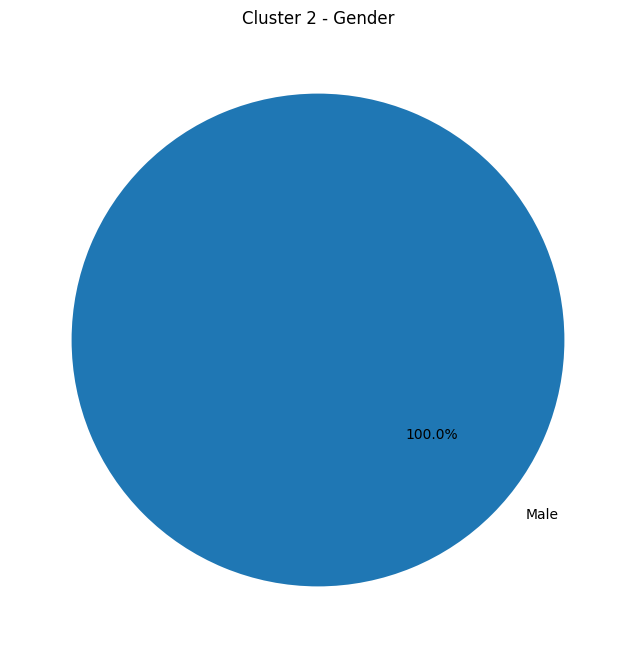

In [10]:
def plot_pie_charts(df, cat_columns):
    cluster_labels = df['Cluster'].unique()
    
    for col in cat_columns:
        for cluster in cluster_labels:
            plt.figure(figsize=(8, 8))
            subset = df[df['Cluster'] == cluster]
            counts = subset[col].value_counts()
            plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
            plt.title(f'Cluster {cluster} - {col}')
            plt.show()

# Call the function with the list of categorical columns
plot_pie_charts(df, cat_columns)


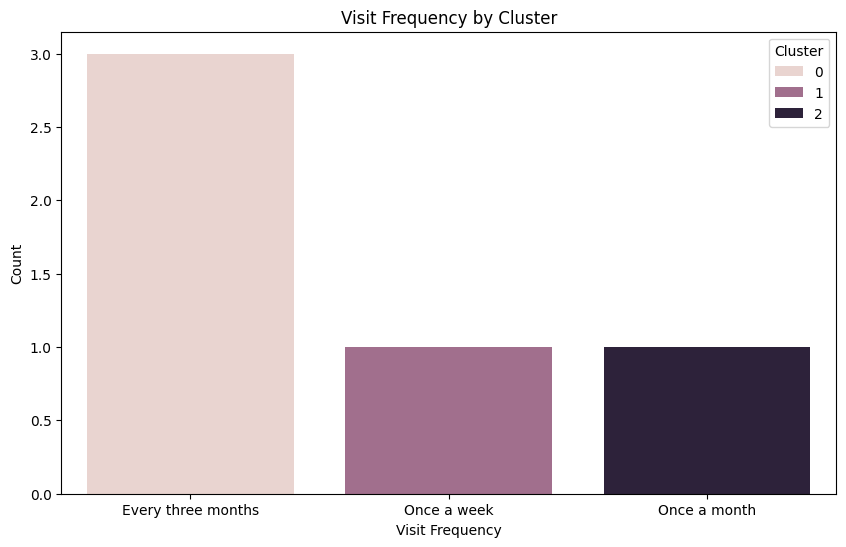

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='VisitFrequency', hue='Cluster', data=df)
plt.title('Visit Frequency by Cluster')
plt.xlabel('Visit Frequency')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.show()


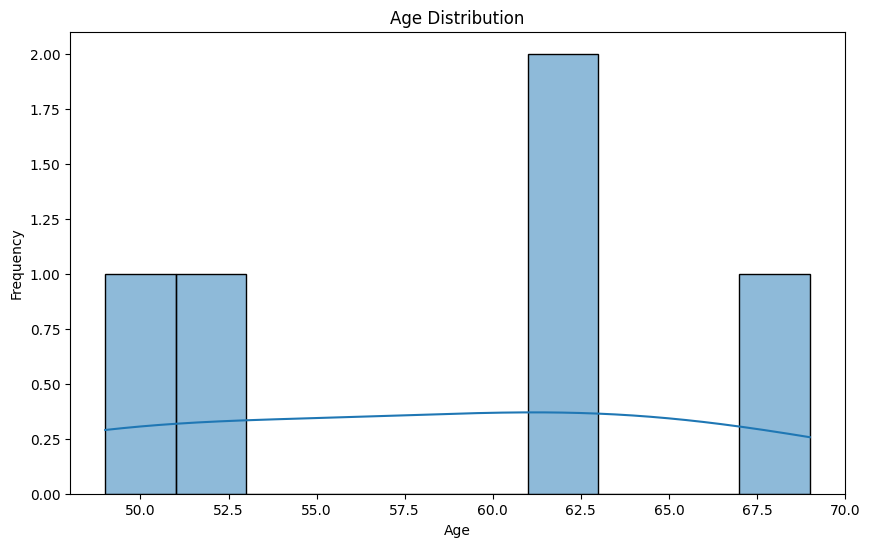

In [12]:
# Example: Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


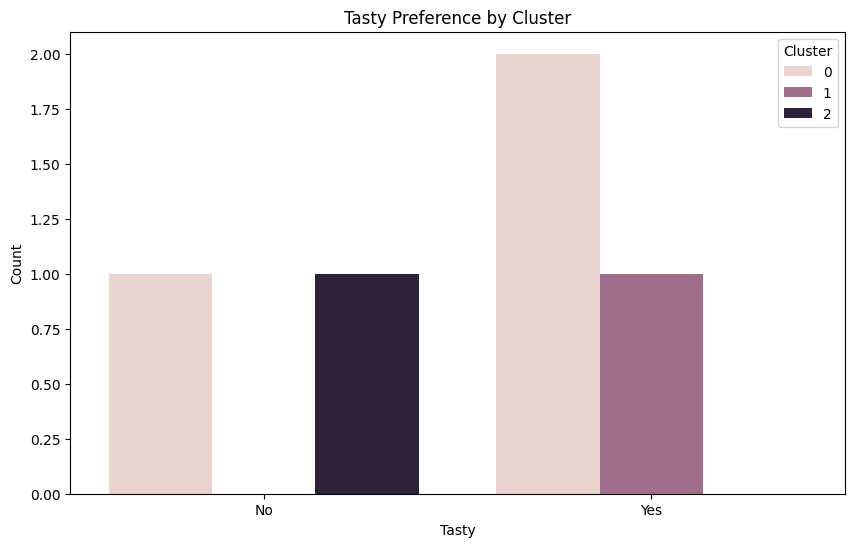

In [13]:
# Example: Tasty Preference by Cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='tasty', hue='Cluster', data=df)
plt.title('Tasty Preference by Cluster')
plt.xlabel('Tasty')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.show()


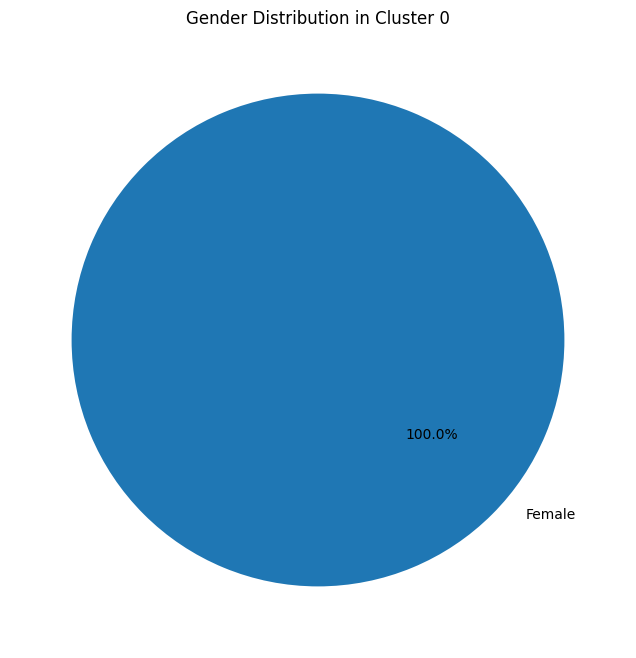

In [14]:
# Example: Pie Chart of Gender Distribution in Cluster 0
plt.figure(figsize=(8, 8))
cluster_0 = df[df['Cluster'] == 0]
gender_counts = cluster_0['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution in Cluster 0')
plt.show()


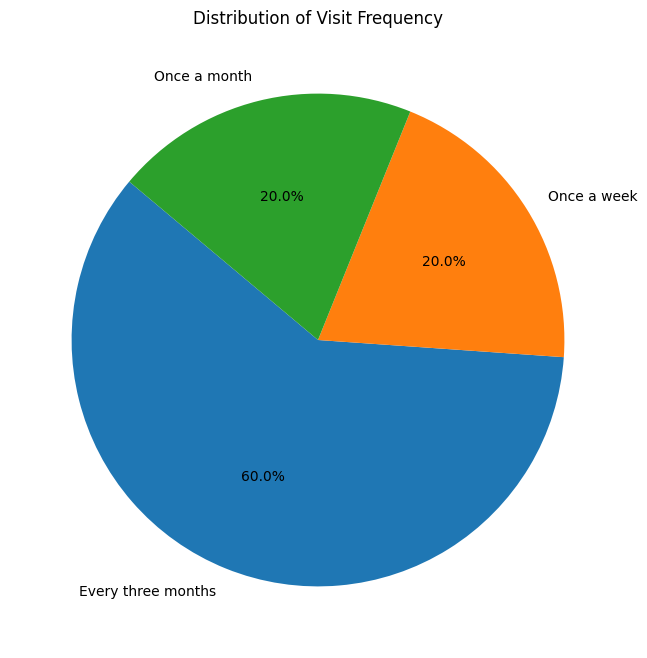

In [15]:
import matplotlib.pyplot as plt

# Pie Chart for VisitFrequency
plt.figure(figsize=(8, 8))
visit_counts = df['VisitFrequency'].value_counts()
plt.pie(visit_counts, labels=visit_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Visit Frequency')
plt.show()


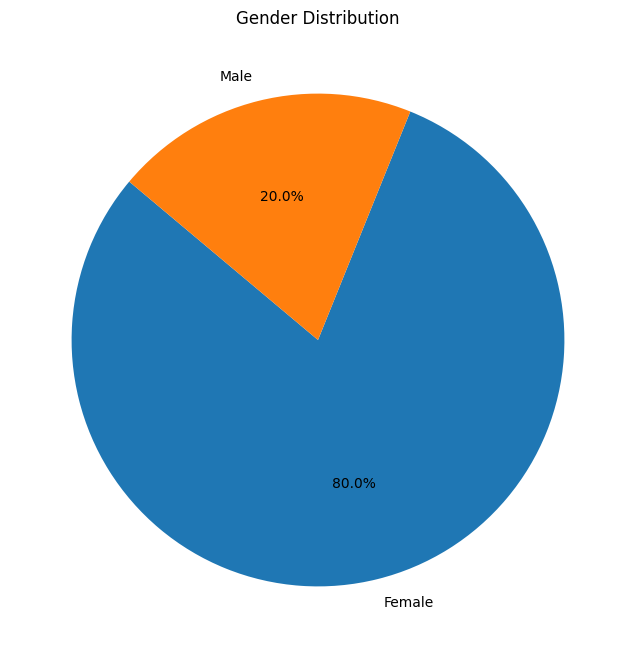

In [16]:
# Pie Chart for Gender
plt.figure(figsize=(8, 8))
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()
